In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Image/pepper.bmp')

def cvtGray(InputImage): # 3채널 이미지 input
    binaryImage = img[:,:,0]*0.2 + img[:,:,1]*0.5 + img[:,:,2]*0.3
    binaryImage = binaryImage.astype('uint8')
    return binaryImage

def toHist(inputImage, bins):
    h, w = inputImage.shape[:2]
    hist = np.zeros(bins)
    width= 256 / bins
    inputImage = inputImage // width
    for i in range(h):
        for j in range(w):
            index = int(inputImage[i][j])
            hist[index] +=1 
            
    return hist

grey = cvtGray(img)
h,w = grey.shape
hist = toHist(grey,256)

In [33]:
norm_hist = hist / ( h * w )        # PDF
cul_hist  = np.cumsum(norm_hist)    # CDF

In [34]:
cul_hist  = np.cumsum(norm_hist)    # CDF

In [35]:
cul_hist = cul_hist * 256
cul_hist = np.around(cul_hist)      # transfer function
cul_hist

array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   3.,   4.,
         4.,   6.,   7.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  15.,  16.,  17.,  17.,  18.,  19.,  19.,  20.,  20.,  21.,
        21.,  22.,  22.,  23.,  23.,  24.,  24.,  24.,  25.,  25.,  26.,
        26.,  27.,  27.,  28.,  28.,  29.,  30.,  30.,  31.,  32.,  33.,
        34.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  53.,  54.,
        55.,  57.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,  75.,
        77.,  80.,  82.,  85.,  88.,  91.,  93.,  96.,  99., 102., 104.,
       107., 109., 111., 112., 114., 115., 117., 118., 119., 120., 122.,
       123., 124., 125., 126., 127., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138., 139., 141., 142., 143., 145., 146., 147.,
       149., 150., 152., 153., 155., 157., 158., 160., 162., 163., 165.,
       167., 169., 170., 172., 174., 176., 178., 17

In [36]:
equalized_grey = cul_hist[grey].astype('uint8')  #transform

In [37]:
cv2.imshow('eqaul', equalized_grey)
cv2.imshow('grey', grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

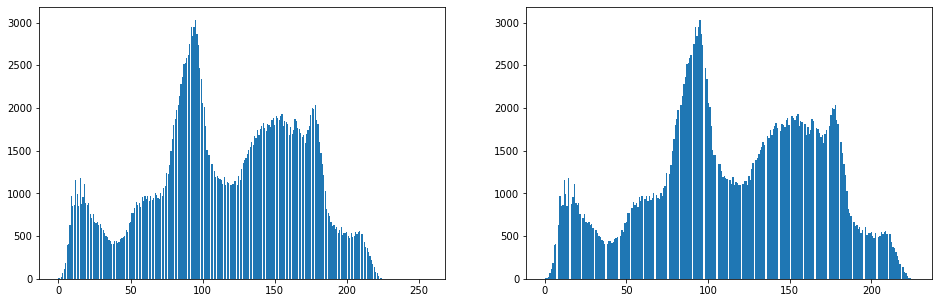

In [38]:
x = np.arange(len(hist))

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(x,hist)
plt.subplot(1,2,2)
plt.hist(grey.ravel(),bins=256)
plt.show()

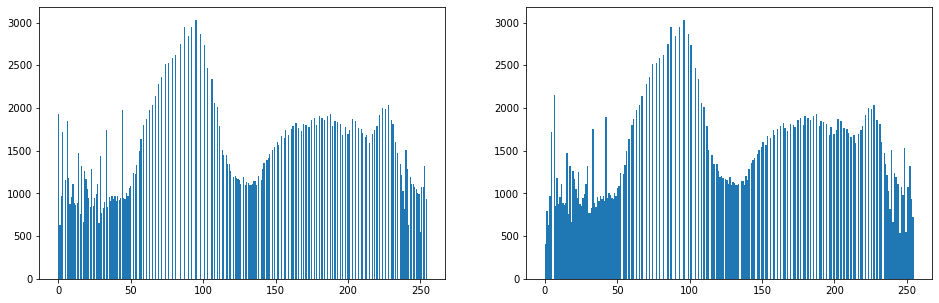

In [39]:
img2 = cv2.equalizeHist(grey)

equalized_hist = toHist(equalized_grey,255)
x = np.arange(len(equalized_hist))

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(x,equalized_hist)
plt.subplot(1,2,2)
plt.hist(img2.ravel(),bins=256)
plt.show()